#7.1 인공 신경망(ANN)

패션 MNIST활용 - 딥러닝을 처음 배울 때 많이 사용하는 데이터셋

**패션 MNIST**

In [4]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


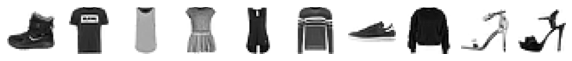

In [7]:
#샘플 몇개만 보자..
import matplotlib.pyplot as plt
fig, axs=plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')    #어두운게 픽셀값이 높음
    axs[i].axis('off')
plt.show()

In [8]:
#열개의 타깃값..
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [9]:
#0~9까지의 레이블..
import numpy as np
print(np.unique(train_target, return_counts=True))
#고르게 1000개씩..

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


**로지스틱 회귀로 패션 아이템 분류하기**

손실함수를 log로 지정하고, 픽셀의 값이 0 ~ 255에서 0 ~ 1로 전처리한다..

reshape()메서드로 2차원인 픽셀값을 1차원으로 바꾼다..

In [10]:
#확률적 경사하강법..
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [11]:
print(train_scaled.shape)

(60000, 784)


In [12]:
#객체를 만들어 교차검증함 해보자..
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

#손실함수 및 반복횟수 지정
sc = SGDClassifier(loss = 'log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [13]:
#max_iter를 늘려도 성능은 그닥..
sc = SGDClassifier(loss = 'log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303833333333334


- 784개의 특성, 10개의 클래스
- 각각의 클래스를 위한 가중치, 절편이 달라야 한다
- 총 784*10(가중치) + 10(절편)의 모델 파라미터가 학습된다.
- 그런다음 열 개의 z값을 소프트맥스함수에 넣음.. -> 각 클래스마다의 확률이 나온다.

**인공 신경망**

출력층 : z1~z10까지를 계산하고 이를 바탕으로 클래스를 예측함. 신경망의 최종 값을 만듦..

뉴런(유닛) : z값을 계산하는 단위..

입력층 : 픽셀값 그 자체.. 들어오는 입력 특성..



생물학적 뉴런과 인공 신경망 출력층의 뉴런 하나와는 비슷하지만 하는 일을 비슷하게 구현한 것은 아님..

그냥 알고리즘일 뿐이다..

**텐서플로와 케라스**

딥러닝 라이브러리는 GPU를 사용한다( 벡터와 행렬 연산에 매우 최적화 되어있음 )

프랑소와 숄레가 케라스를 만들었다

케라스는 GPU연산을 직접 하지않고, 다른 라이브러리를 백엔드로 둔다..

텐서플로가 그중 하나다..

근데 결국 프랑소와가 구글에 합류.. -> 텐서플로 == 케라스..

In [14]:
import tensorflow as tf
from tensorflow import keras

**인공 신경망으로 모델 만들기**

교차검증을 하지 않고 별도의 검증 세트를 만든다

    1) 딥러닝 분야의 데이터셋이 큼.. -> 검증 점수가 안정적이다.

    2) 교차검증하면 너무 오래걸린다..

In [15]:
#검증세트 20퍼센트로 따로 생성
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


**밀집층(완전연결층)**

: 784 * 10 개의 선으로 빽빽하게 연결되어있는 층..

In [17]:
# keras의 layers패키지에는 다양한 층이 준비됨
# keras의 Dense클래스를 이용한 밀집층 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 뉴런갯수, 활성화함수, 입력크기

- 10개의 패션아이템을 분류하므로 뉴런 갯수는 10개
- 다중분류기 때문에 활성화함수는 소프트맥스
- 입력특성이 28*28이므로 784..


**활성화 함수**

- 뉴런의 선형방정식 계산 결과에 적용되는 함수..
- 하나의 층으로 보기도 하는데 있기는 무조건 있다

In [18]:
#모델만드는데는 Sequential() 클래스.. -> dense층을 이용해서 모델을 만든다!
model = keras.Sequential(dense)

**인공 신경망으로 패션 아이템 분류하기**

케라스 모델은 훈련하기전 설정단계가 있다

model()객체의 compile() 메서드를 수행한다

손실함수를 꼭 지정해야 하고 훈련과정에서 계산하고 싶은 측정값을 지정한다.

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

로지스틱 회귀
    
    - 이진 분류 : 이진 크로스 엔트로피 손실 함수
    - 다중 분류 : 크로스 엔트로피 손실 함수

케라스

    - 이진 분류 : loss = 'binary_crossentropy'
    - 다중 분류 : loss = 'categorical_crossentropy'

이렇게 같은걸 다르게 부르는 거 뿐이다

로지스틱에서 이진 크로스 엔트로피에서..

- -log(a) * (타깃값) 혹은 -log(1-a) * (1-타깃값) 으로 계산했다
- 하나의 뉴런만으로 양성 음성클래스 모두 계산 가능했다..

그럼 다중분류일 때는?  ->  **원핫인코딩!**

하는 이유 : **다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위해서**

- 원하는 클래스의 손실값을 계산하기위해 그 클래스말고 나머지 확률에는 모두 0을 곱한다
- 결국 활성화함수 출력값(a1 ~ a10)에서 원하는 클래스만 1이 타깃이고 나머지는 다 0..
- ex) [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 이런 배열을 [a1, a2, a3, ... ,a10]에 곱함
- 그 계산을 하고 나온 값이 1에 가까울 수록 신경망이 정확하게 분류하는 것이다..

In [20]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


텐서플로에서는 지금처럼 타깃값이 정수인 것은 원핫인코딩으로 안바꿔도 됨..

정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산한 것 : sparse_categorical_crossentropy!

metric 매개변수

- 훈련과정에서 측정하고 싶은 지표를 지정한다

- 케라스는 기본적으로 각 에포크마다 손실 값을 출력해준다..

- 손실값이 줄어가는 걸 보고 좋아할 수도 있는데, 정확도도 있으면 좋다..

- 그래서 metric = 'accuracy'를 지정했다..

In [21]:
model.fit(train_scaled, train_target, epochs=5) #에포크수 지정..

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6016 - accuracy: 0.7942
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4789 - accuracy: 0.8397
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4554 - accuracy: 0.8485
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4441 - accuracy: 0.8521
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4360 - accuracy: 0.8558


In [22]:
#모델 성능 평가하는 evaluate()메서드..
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4541 - accuracy: 0.8470


[0.4540669620037079, 0.847000002861023]

**사이킷런 모델과 케라스 모델의 차이**

In [23]:
"""
사이킷런 모델

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter=5)        ->객체 생성 시 바로 손실함수와 반복횟수 지정
sc.fit(train_scaled, train_target)                  ->훈련
sc.score(val_scaled, val_target)                    ->평가 메서드

케라스 모델

from tensorflow import keras
dense = keras.layers.Dense(10,activation='softmax', input_shape=(784,))     -> 층 생성
model = keras.Sequential(dense)                                             -> 모델 생성(Sequential 클래스 사용)
model.compile(loss='sparse_categorical_crossentropy',metric='accuracy')     -> 설정단계에서 손실함수와 출력할 거 지정
model.fit(train_scaled, train_target, epoch = 5)                            -> 모델 훈련, 에포크수 지정
model.evaluate(val_scaled, val_target)                                      -> 평가 메서드
"""

"\n사이킷런 모델\n\nfrom sklearn.linear_model import SGDClassifier\nsc = SGDClassifier(loss = 'log', max_iter=5)        ->객체 생성 시 바로 손실함수와 반복횟수 지정\nsc.fit(train_scaled, train_target)                  ->훈련\nsc.score(val_scaled, val_target)                    ->평가 메서드\n\n케라스 모델\n\nfrom tensorflow import keras\ndense = keras.layers.Dense(10,activation='softmax', input_shape=(784,))     -> 층 생성\nmodel = keras.Sequential(dense)                                             -> 모델 생성(Sequential 클래스 사용)\nmodel.compile(loss='sparse_categorical_crossentropy',metric='accuracy')     -> 설정단계에서 손실함수와 출력할 거 지정\nmodel.fit(train_scaled, train_target, epoch = 5)                            -> 모델 훈련, 에포크수 지정\nmodel.evaluate(val_scaled, val_target)                                      -> 평가 메서드\n"

#7.2 심층 신경망(DNN)

**2개의 층**

In [24]:
#데이터 준비
# 스케일링 및 1차원으로의 변경
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [25]:
from sklearn.model_selection import train_test_split
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

**은닉층**

: 입력층과 츨력층 사이에 또다른 밀집층이 추가됨

: 이렇게 사이에 추가된 모든 밀집층을 은닉층이라고 한다

: 모든 은닉층에는 활성화 함수가 존재한다  ->  활성화함수가 없으면 하는 역할이 없다..

: 은닉층의 활성화함수는 출력층 보다는 자유롭다

: 은닉층의 뉴런 갯수는 출력층의 뉴런보다만 많으면 된다.

In [26]:
#은닉층과 출력층 만들기
dense1 = keras.layers.Dense(100,activation='sigmoid', input_shape=(784,))       #은닉층
dense2 = keras.layers.Dense(10, activation='softmax')                           #출력층

**심층 신경망 만들기**

In [27]:
#층 여러개 추가하려면 리스트로 추가
#층을 추가하여 강력한 성능을 낸다..
model = keras.Sequential([dense1, dense2])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


summary()메서드 분석

    1) 모델이름

    2) 모델의 층이 순서대로 나열됨
        - 층마다 이름, 클래스, 출력크기, 모델파라미터수가 출력됨
        - 입력 샘플개수가 None인데, 이는 fit()할 때 데이터를 미니배치 경사하강법을 사용해서 아직 정의 안됨
        - 기본 미니배치 32, fit의 batch_size에서 지정가능
    3) 총 모델 파라미터수와 훈련되지 않는 파라미터 갯수 출력

**층을 추가하는 다른 방법**

In [29]:
#직접 추가해서 바로 만듦..
model = keras.Sequential([keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'), 
                          keras.layers.Dense(10,activation='softmax', name='output')], name='패션 MNIST 모델')

In [30]:
#이름을 지정하는 name매개변수..
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
#층을 추가할때 사용하는 Sequential클래스의 add()메서드

model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'))
model.add(keras.layers.Dense(10,activation='softmax',name='output'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
#모델 훈련.. 전에 설정단계 필수!
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5664 - accuracy: 0.8052
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4072 - accuracy: 0.8536
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3731 - accuracy: 0.8662
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8739
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8794


**렐루(ReLU)함수**

- 특히 이미지 처리에서 좋은 성능을 냄
- 입력이 양수일 경우 그대로 출력
- 입력이 음수면 무조건 0 출력

ReLU(z) = max(0,z)

-> z가 0보다 크면 z를 출력하고 0보다 작으면 0을 출력

In [34]:
#reshape()말고 그냥 케라스의 Flatten 층을 하나 만들어서 1차원으로 만들 수도 있다.

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [35]:
model.summary()

#그냥 단지 펼쳐주기만 하는 Flatten 층.. -> 모델 파라미터 학습은 없다..
#입력값의 차원이 출력되므로 차원을 짐작할 수 잇다는것도 장점임

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [36]:
#reshape()없이 데이터 준비..
(train_input, train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled= train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [37]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5311 - accuracy: 0.8141
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3930 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3324 - accuracy: 0.8805
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.8857


In [38]:
# 검증세트 성능 검증
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3367 - accuracy: 0.8823


[0.336662232875824, 0.8823333382606506]

**옵티마이저**

- 하이퍼 파라미터는 엄청 많다.. 특히 신경망에는 많다..

- 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공한다. 이를 **옵티마이저**라고 부른다

- compile()메서드에서는 기본경사하강법 알고리즘인 RMSprop를 사용했고, 이 알고리즘을 선택해야하기 때문에 이것도 하이퍼 파라미터고, 그 알고리즘의 학습률도 하이퍼 파라미터이다..

In [39]:
"""
SGD 옵티마이저 이용
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
애도 자동으로 옵티마이저 객체를 만들긴 한다.

'sgd'이렇게 안쓰려면 sgd옵티마이저 객체를 생성해놓아야한다.
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

이렇게 쓸 수 있다
"""
"""
학습률을 바꾸고 싶다면?
sgd = keras.optimiziers.SGD(learning_rate=0.1)
이런식으로..
"""

'\n학습률을 바꾸고 싶다면?\nsgd = keras.optimiziers.SGD(learning_rate=0.1)\n이런식으로..\n'

기본 경사하강법 옵티마이저

: SGD (모멘텀 , 네스테로프 모멘텀)

    - SGD 클래스 안에 momentum, nesterov매개변수가 있는 것이다..
    - momentum매개변수를 0보다 큰 값으로 지정하면 모멘텀 최적화를 사용함..
    - nesterov매개변수를 True로 바꾸면 네스테로프 모멘텀 최적화를 사용함..
    - 대부분 네스테로프 모멘텀 최적화가 기본 보다 성능이 더 낫다

적응적 학습률 옵티마이저

: RMSprop, Adagrad, Adam.. 얘네는 각각의 클래스이다..
: 학습률 매개변수를 튜닝하는 수고를 덜 수 있다.

    - 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다..
    - 모두 기본값으로 learning_rate = 0.001을 사용한다

In [40]:
"""
Adagrad 와 RMSprop를 옵티마이저로 이용

adagrad = keras.oprimizers.Adagrad()
model.compile(optimizer=adagrad, ... )

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, ... )

요론식으로 둘다 가능..
"""

'\nAdagrad 와 RMSprop를 옵티마이저로 이용\n\nadagrad = keras.oprimizers.Adagrad()\nmodel.compile(optimizer=adagrad, ... )\n\nrmsprop = keras.optimizers.RMSprop()\nmodel.compile(optimizer=rmsprop, ... )\n\n요론식으로 둘다 가능..\n'

In [41]:
# 모멘텀 최적화와 RMSprop의 장점을 접목한 Adam옵티마이저로 훈련..
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
#기본값인 RMSprop를 사용할 때랑 비슷하다..

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5282 - accuracy: 0.8166
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3928 - accuracy: 0.8594
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3525 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3240 - accuracy: 0.8812
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3054 - accuracy: 0.8875


In [43]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3476 - accuracy: 0.8762


[0.3476276099681854, 0.8761666417121887]

#7.3 신경망 모델 훈련

**손실 곡선**

fit()이라는 메서드는 History 클래스 개게를 반환한다..

History 객체에는 훈련과정에서 계산한 지표(손실과 정확도)가 저장되어 있다

In [44]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [45]:
#모델을 만드는 함수..

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))        #Flatten층
    model.add(keras.layers.Dense(100,activation='relu'))        #은닉층 하나는 무조건
    if a_layer:     #특별히 추가하라는 층이 있으면 만든다..
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))      #출력층..
    return model

In [46]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [47]:
#History객체를 변수에 담아보자
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
#verbose : 훈련과정 출력을 조절함..  기본값 1 : 모든 에포크마다 지표출력.. 0이면 출력안함..

In [48]:
#히스토리 객체에는 훈련 측정값이 담겨있는 history딕셔너리가 들어있다..
#딕셔너리에 뭐가 있을까?

print(history.history.keys())
#손실과 정확도.. metrics='accuracy'를 지정했기 때문에 정확도도 저장되어있다..

dict_keys(['loss', 'accuracy'])


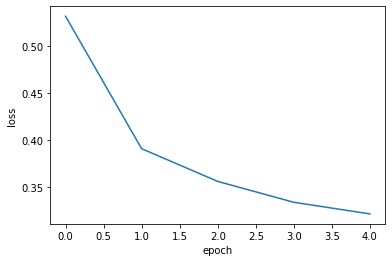

In [49]:
#에포크마다 손실값을 그려보자..
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

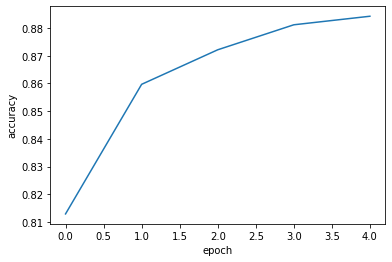

In [50]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

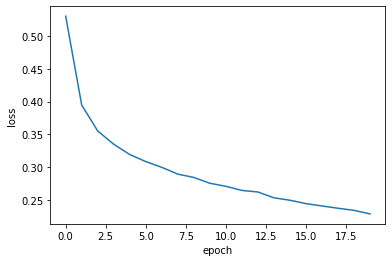

In [51]:
#에포크를 늘리면 손실은 계속 줄어들 수 있지만 훈련세트에 과대적합 될 수 있다..
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**검증손실**

훈련세트의 손실만 계속 줄이다보면 과대적합된다..

검증세트의 점수도 적절해야한다..

검증세트의 손실도 저장하려면 fit()메서드에 validation_data매개변수에 검증데이테의 입력과 타깃을 튜플로 묶어 전달해야한다.

In [52]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,verbose=0, validation_data=(val_scaled, val_target))

In [53]:
print(history.history.keys())
#검증 손실, 검증 정확도 추가됨.. fit()에 검증데이터가 들어가서 그럼

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


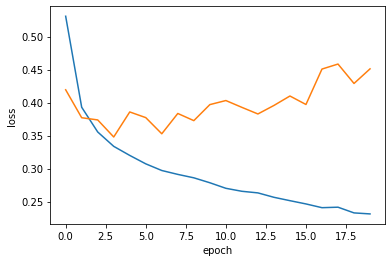

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

검증세트 손실이 여기서는 2.5에포크 이후에 꾸준히 증가한다... -> 그 이후로는 과대적합!

과대적합을 억제하기위한 신경망 특화 규제방법도 있다..

여기서는 일단 옵티마이저를 이용 -> Adam옵티마이저..

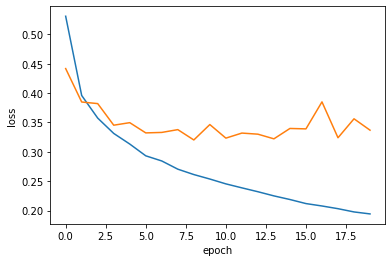

In [57]:
model= model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

과대적합이 훨씬 줄었다..

Adam옵티마이저가 이 데이터 셋에 잘 맞음..

더 나은 것을 얻으려면 학습률을 조정해서 다시 시도 하면 됨..

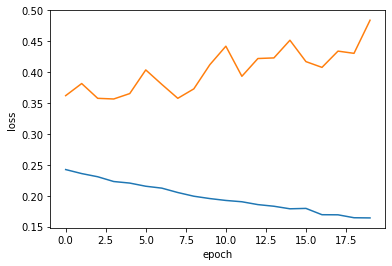

In [58]:
adam = keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

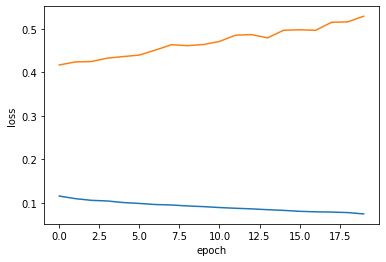

In [59]:
adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

학습률을 어떻게 해야할까..??

**드롭아웃**

- 제프리 힌턴이 소개함..

- 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만듦) 과대적합을 막는다.

- 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있다..

- p.401의 두 신경망 그림을 보면 마치 두 개의 신경망을 앙상블하는 것처럼 상상도 가능.. -> 과대적합을 막을 수 있다!

- keras.layers 패키지에 Dropout 클래스를 제공..

- 어떤 층 뒤에 드롭아웃을 두어서 그 층의 출력을 랜덤하게 0으로 만든다.. -> 하지만 훈련되는 모델 파라미터는 없다..

In [61]:
model = model_fn(keras.layers.Dropout(0.3))     #30프로를 드롭아웃하겠다..
model.summary()
#은닉층 뒤에 드롭아웃하는 층이 들어감..
#훈련하는 모델 파라미터는 없음

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


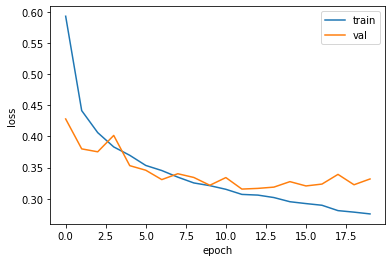

In [62]:
#하지만 평가나 예측을 할때는 드롭아웃을 쓰면 안된다..
#텐서플로와 케라스가 알아서 드롭아웃을 빼준다..
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 훈련세트와 검증세트의 손실을 그래프고 그림..
# 조금 과대적합 된거 같으니까 에포크를 10으로 다시 지정하고 훈련!

**모델 저장과 복원**

In [63]:
#에포크 10지정
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

훈련된 모델 파라미터만 저장

    - save_weights() 
    - 다시 불러올때는 load_weights()
    - 기본 포맷은 텐서플로의 체크포인트 포맷
    - 파일 확장자가 '.h5'일 경우는 HDF5포맷으로 저장

모델 자체를 저장
    
    - save()
    - 다시 불러올때는 load_model()
    - 기본 포맷은 텐서플로의 SavedModel 포맷
    - 파일 확장자가 '.h5'일 경우 HDF5포맷으로 저장

In [64]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [65]:
#파일 확인..
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Jul 14 05:05 model-weights.h5
-rw-r--r-- 1 root root 981736 Jul 14 05:05 model-whole.h5


In [66]:
"""
새로운 모델을 만들고 모델 파라미터만 불러와서 모델을 만듦
"""
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
#다시 불러오려면 저장했던 모델과 불러오는 모델이 정확히 같아야 한다.

검증정확도 확인..

predict()메서드는 샘플마다 10개의 클래스에 대한 확률을 모두 반환한다..

검증세트 수가 12000개였으니까 결과적으로 (12000, 10)크기의 배열을 반환한다.



In [67]:
import numpy as np     
#axis=-1 이면 마지막 축.. 그 shape()해서 나온거의 인덱스로 생각하면 된다..
#argmax로 샘플마다 가장 확률이 높은 클래스의 인덱스를 뽑아냈고
val_labels = np.argmax(model.predict(val_scaled), axis=-1) 

#그 인덱스와 타깃이 같다면 mean()안의 매개변수가 1이 되고 아니면 0이다..
#이를 모두 평균하면 정확도가 된다!
print(np.mean(val_labels==val_target))

0.8794166666666666


In [68]:
"""
처음 모델을 생성할때 부터 load_model()메서드를 써서 바로 저장된걸 가져왔다.
"""
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

#동일한 모델이니까 정확도가 같다..

375/375 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8794


[0.3241550624370575, 0.8794166445732117]

**콜백**

콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

    - keras.callbacks 패키지에 있는 클래스
    - fit()메서드에 callbacks 매개변수에 리스트로 전달하여 사용..

ModelCheckpoint 콜백은 기본적으로 최상의 검증점수를 만드는 모델을 저장한다

    -> 파일을 'best-model.h5'로 지정해서 콜백 적용해보자..

In [69]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')      #콜백 객체 생성

#체크포인트 지정
model.fit(train_scaled, train_target, epochs=20,verbose=0, validation_data=(val_scaled, val_target), callbacks = [checkpoint_cb])

In [70]:
#체크포인트에 최적의 검증점수를 만드는 모델이 저장되어있다.. 파일이름은 'best-model.h5'이다.
# 그 모델을 고대로 불러와서 검증 다시 해보자
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.8857


[0.3179798722267151, 0.8856666684150696]

콜백이 최적의 모델을 저장해주긴 한다...

그래도 아직 20번의 에포크를 수행한다!!

**조기종료** : 과대적합이 시작되기 전에 훈련을 미리 중지하는 것

    -> 컴퓨터 자원과 시간을 아낄 수 있다..

케라스는 EarlyStopping 콜백을 제공한다

    - moniter 매개변수
        : 모니터할 지표를 지정한다
        : 기본값은 'val_loss'로 검증손실을 관찰한다.
    - patience 매개변수
        : 검증점수가 향상되지 않더라도 참을 에포크 횟수를 지정할 수 있다
        : 그 이후엔 훈련 중지
    - restore_best_weights 매개변수
        : True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.
    
EarlyStopping, ModelCheckpoint 콜백을 함께 사용하면 가장 낮은 검증손실의 모델을 파일에 저장하고, 검증 손실이 증가할 때 훈련을 중지할 수 있다!!

-> 에포크 수에 구애받지 않을 수 있다



In [71]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
#콜백 두개 다 지정..
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

#콜백 매개변수에 리스트로 묶어서 전달함..
history = model.fit(train_scaled, train_target, epochs=20,verbose=0, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

훈련을 마치면 early_stopping_cb의 stopped_epoch속성에서 몇번째 에포크에서 중지되었는지 알 수 있다..

In [72]:
print(early_stopping_cb.stopped_epoch)
#에포크는 0번째 부터 시작하므로 13번째 에포크..

12


patience = 2로 지정했으므로 아마 11번째 에포크에서 검증점수가 최대일 것이다

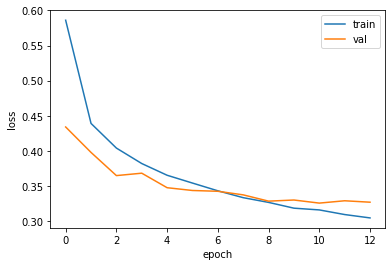

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#역시,, 11번째 에포크인 epoch = 10에서 최상의 모델이 있다..

두 콜백을 같이 쓰면 알아서 훈련 중지하고 최상의 모델을 자동 저장한다

In [74]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8838


[0.32586902379989624, 0.8837500214576721]

**정리**

신경망의 과대적합을 막기위한 **드롭아웃**
    
    -> 랜덤으로 층의 일부 뉴런의 출력을 0으로 만듦
    -> 신경망을 앙상블 하는 효과를 냄

케라스는 훈련된 모델파라미터들이나 모델 자체를 저장했다가 다시 불러오는 메서드 지원..

과대적합이 되기전의 최적의 모델을 자동으로 간편하게 저장해주는 **콜백**

    -> ModelCheckpoint 클래스 : 최적의 검증점수를 갖는 모델을 저장.. -> 파일에 따로 저장
    -> EarlyStopping 클래스 : patient매개변수를 통해 검증점수가 지정 에포크 횟수 만큼 계속 증가하면 훈련 강제 종료